In [1]:
import pandas as pd
import numpy as np

file_paths = [
    '../../doc1/Data/yfinance_data/AAPL_historical_data.csv',
    '../../doc1/Data/yfinance_data/AMZN_historical_data.csv',
    '../../doc1/Data/yfinance_data/GOOG_historical_data.csv',
    '../../doc1/Data/yfinance_data/META_historical_data.csv',
    '../../doc1/Data/yfinance_data/MSFT_historical_data.csv',
    '../../doc1/Data/yfinance_data/NVDA_historical_data.csv',
    '../../doc1/Data/yfinance_data/TSLA_historical_data.csv',
]

stock_symbols = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']


In [2]:

all_data = {}


for i, file_path in enumerate(file_paths):
    df = pd.read_csv(file_path)
    
   
    df = df.drop(columns=['Dividends', 'Stock Splits'])

   
    df['Stock'] = stock_symbols[i]

    
    all_data[stock_symbols[i]] = df
   

In [3]:
def calculate_moving_averages(df, short_window=50, long_window=200):
    df['MA50'] = df['Close'].rolling(window=short_window).mean()
    df['MA200'] = df['Close'].rolling(window=long_window).mean()
    return df


for stock in all_data:
    all_data[stock] = calculate_moving_averages(all_data[stock])


In [4]:
def calculate_rsi(df, window=14):
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    return df


for stock in all_data:
    all_data[stock] = calculate_rsi(all_data[stock])


In [5]:
def calculate_macd(df, short_window=12, long_window=26, signal_window=9):
    short_ema = df['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = df['Close'].ewm(span=long_window, adjust=False).mean()
    df['MACD'] = short_ema - long_ema
    df['MACD_Signal'] = df['MACD'].ewm(span=signal_window, adjust=False).mean()
    df['MACD_Hist'] = df['MACD'] - df['MACD_Signal']
    return df

for stock in all_data:
    all_data[stock] = calculate_macd(all_data[stock])


In [6]:
def calculate_returns(df):
    df['Daily_Return'] = df['Close'].pct_change()
    return df


for stock in all_data:
    all_data[stock] = calculate_returns(all_data[stock])


In [7]:
def moving_averages_insights(df):
    latest_ma50 = df['MA50'].iloc[-1]
    latest_ma200 = df['MA200'].iloc[-1]
    
    if latest_ma50 > latest_ma200:
        trend = "Uptrend"
    else:
        trend = "Downtrend"
    
    return latest_ma50, latest_ma200, trend

for stock in all_data:
    ma50, ma200, trend = moving_averages_insights(all_data[stock])
    print(f"{stock}: 50-Day MA = {ma50:.2f}, 200-Day MA = {ma200:.2f}, Trend = {trend}")


AAPL: 50-Day MA = 210.86, 200-Day MA = 188.91, Trend = Uptrend
AMZN: 50-Day MA = 187.04, 200-Day MA = 167.81, Trend = Uptrend
GOOG: 50-Day MA = 180.17, 200-Day MA = 154.02, Trend = Uptrend
META: 50-Day MA = 491.47, 200-Day MA = 431.02, Trend = Uptrend
MSFT: 50-Day MA = 439.18, 200-Day MA = 402.56, Trend = Uptrend
NVDA: 50-Day MA = 119.38, 200-Day MA = 79.57, Trend = Uptrend
TSLA: 50-Day MA = 206.11, 200-Day MA = 204.48, Trend = Uptrend


In [8]:
def rsi_insights(df):
    
    latest_rsi = df['RSI'].iloc[-1]
    
   
    if latest_rsi > 70:
        rsi_status = "Overbought"
    elif latest_rsi < 30:
        rsi_status = "Oversold"
    else:
        rsi_status = "Neutral"
    
    return latest_rsi, rsi_status


for stock in all_data:
    rsi, status = rsi_insights(all_data[stock])
    print(f"{stock}: RSI = {rsi:.2f}, Status = {status}")


AAPL: RSI = 28.94, Status = Oversold
AMZN: RSI = 22.69, Status = Oversold
GOOG: RSI = 23.15, Status = Oversold
META: RSI = 26.09, Status = Oversold
MSFT: RSI = 21.60, Status = Oversold
NVDA: RSI = 21.04, Status = Oversold
TSLA: RSI = 34.48, Status = Neutral


In [9]:
def macd_insights(df):
    
    latest_macd = df['MACD'].iloc[-1]
    latest_signal = df['MACD_Signal'].iloc[-1]
    
    if latest_macd > latest_signal:
        signal = "Bullish"
    else:
        signal = "Bearish"
    
    return latest_macd, latest_signal, signal

for stock in all_data:
    macd, signal, direction = macd_insights(all_data[stock])
    print(f"{stock}: MACD = {macd:.2f}, Signal = {signal:.2f}, Direction = {direction}")


AAPL: MACD = 2.01, Signal = 4.30, Direction = Bearish
AMZN: MACD = -2.28, Signal = -0.99, Direction = Bearish
GOOG: MACD = -2.71, Signal = -0.65, Direction = Bearish
META: MACD = -10.36, Signal = -6.30, Direction = Bearish
MSFT: MACD = -5.18, Signal = -1.27, Direction = Bearish
NVDA: MACD = -2.95, Signal = -0.39, Direction = Bearish
TSLA: MACD = 5.21, Signal = 10.49, Direction = Bearish


In [10]:
def returns_insights(df):
   
    avg_return = df['Daily_Return'].mean()
    std_dev = df['Daily_Return'].std()
    
    return avg_return, std_dev


for stock in all_data:
    avg_return, std_dev = returns_insights(all_data[stock])
    print(f"{stock}: Average Daily Return = {avg_return:.4f}, Standard Deviation = {std_dev:.4f}")


AAPL: Average Daily Return = 0.0011, Standard Deviation = 0.0279
AMZN: Average Daily Return = 0.0017, Standard Deviation = 0.0354
GOOG: Average Daily Return = 0.0010, Standard Deviation = 0.0193
META: Average Daily Return = 0.0013, Standard Deviation = 0.0243
MSFT: Average Daily Return = 0.0011, Standard Deviation = 0.0211
NVDA: Average Daily Return = 0.0019, Standard Deviation = 0.0379
TSLA: Average Daily Return = 0.0020, Standard Deviation = 0.0359


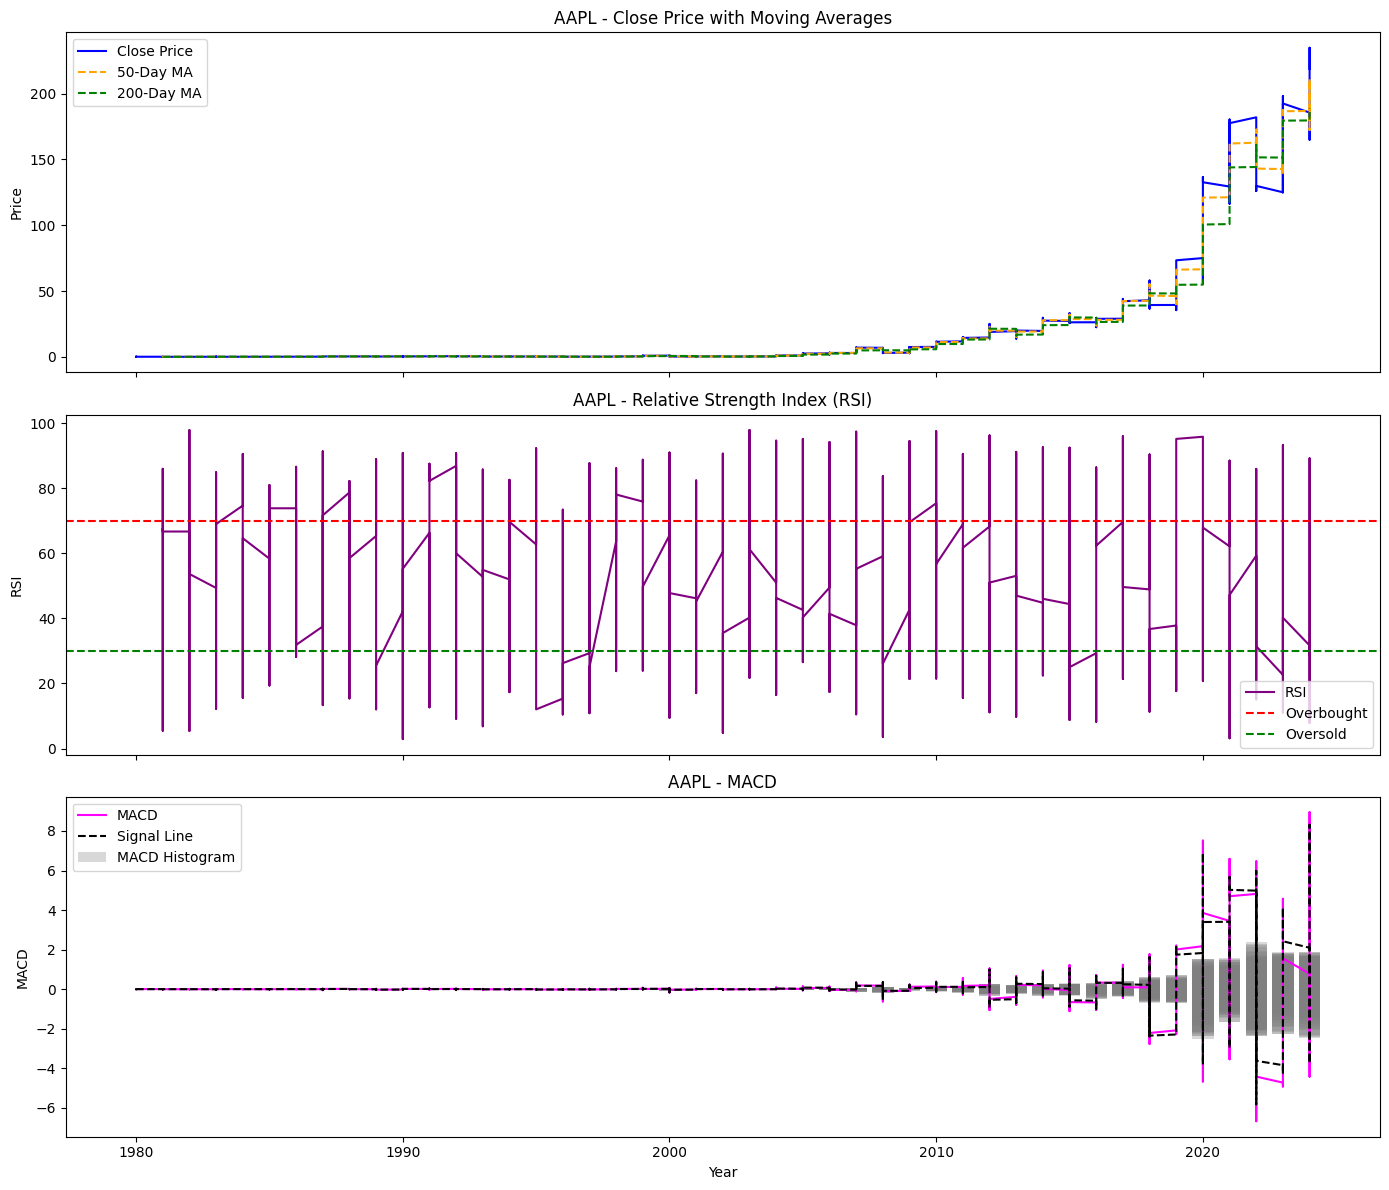

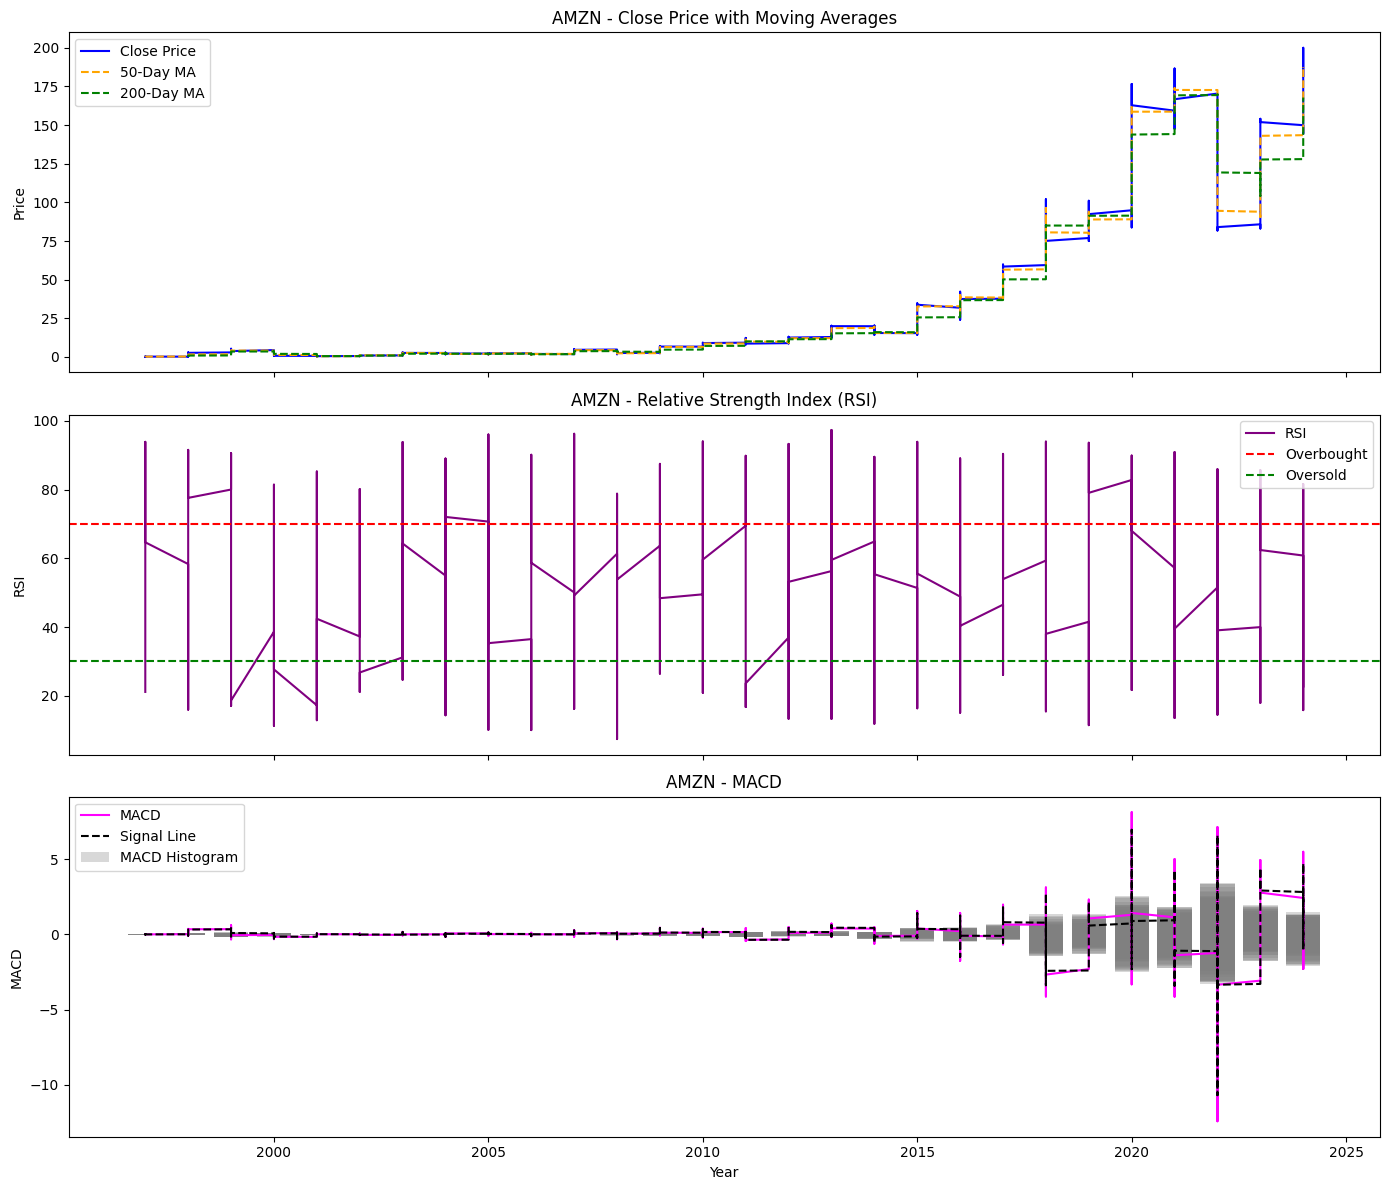

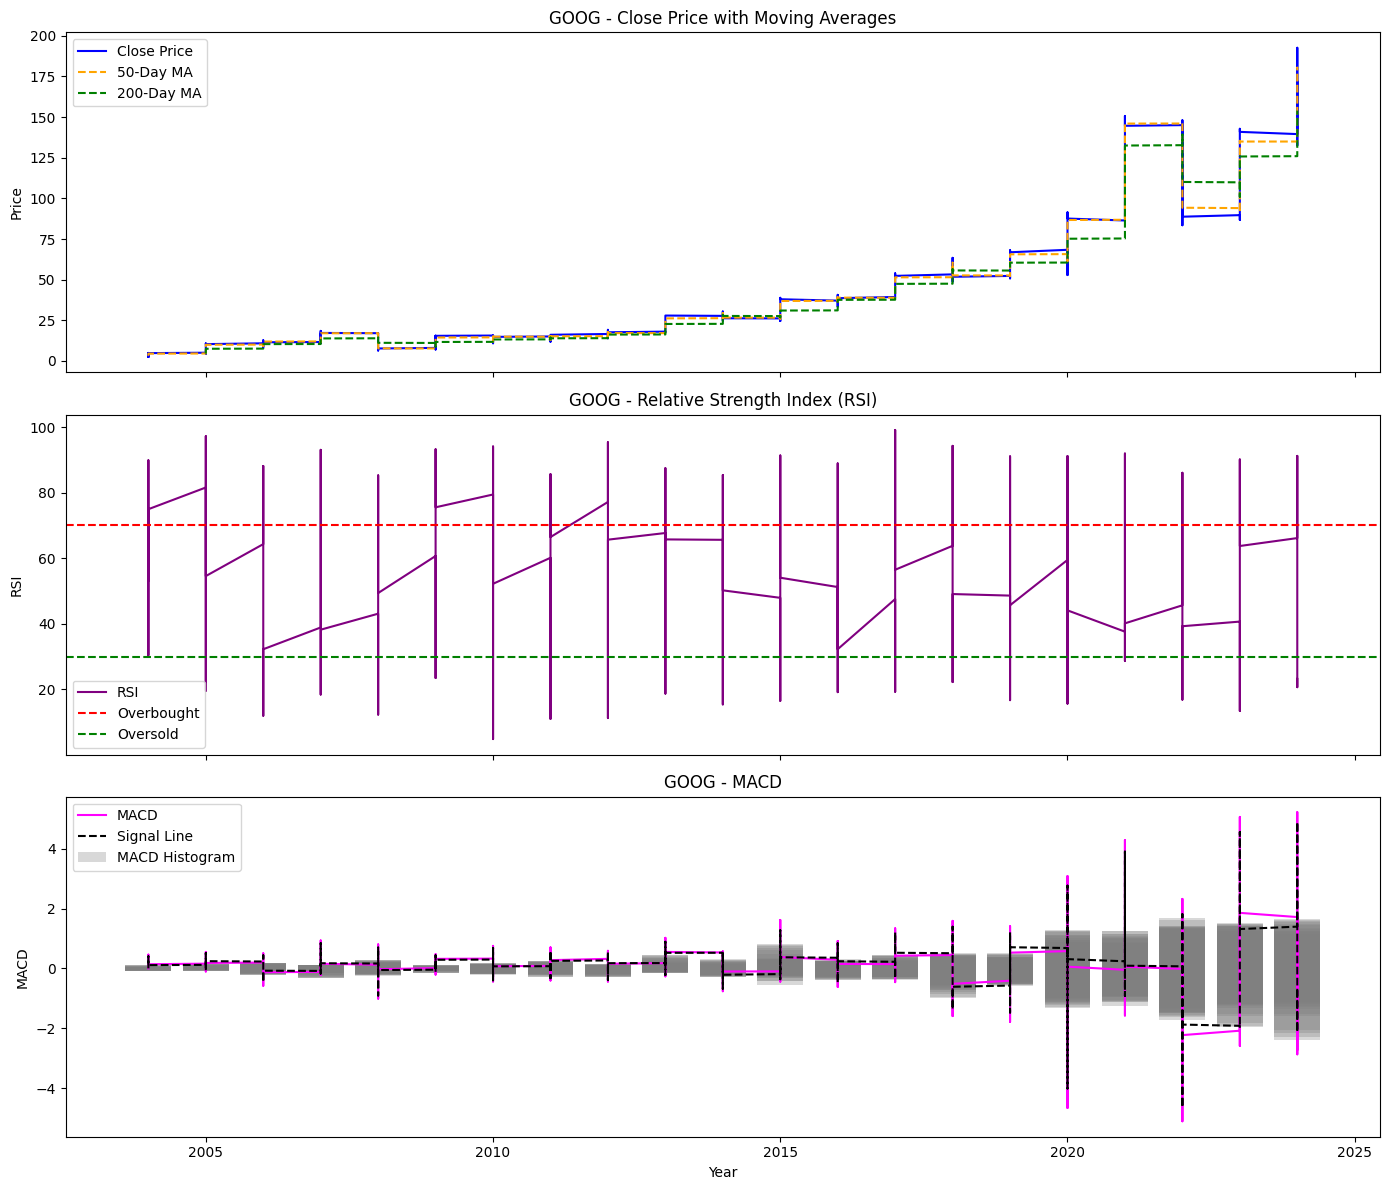

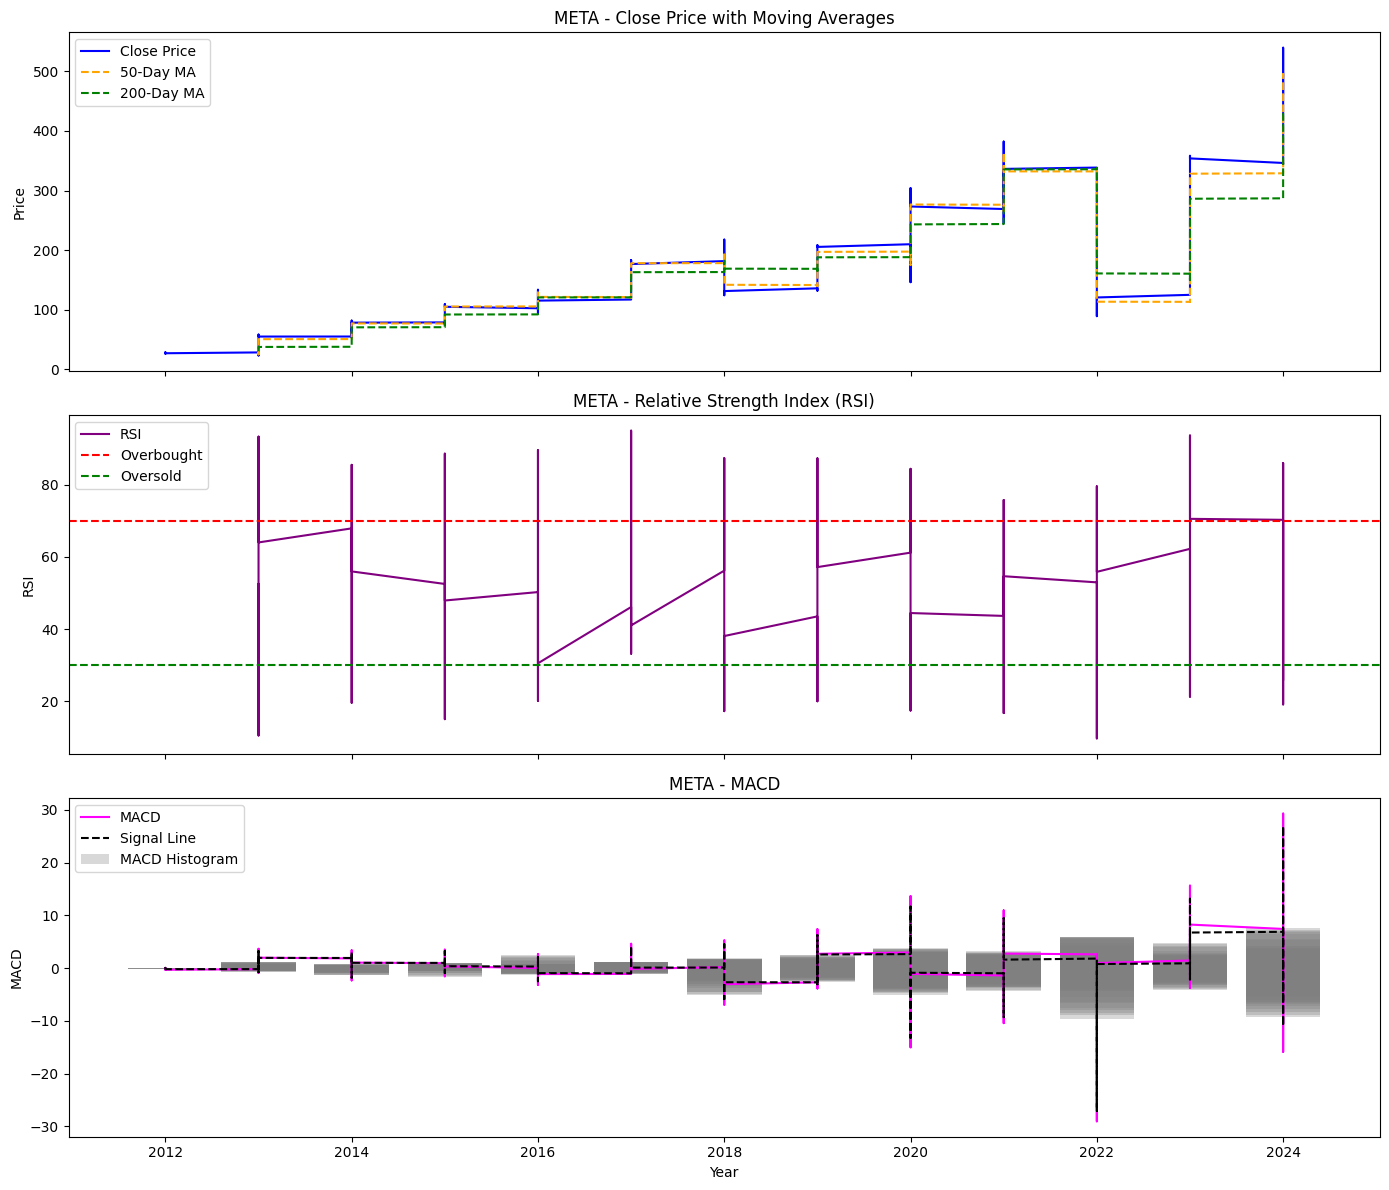

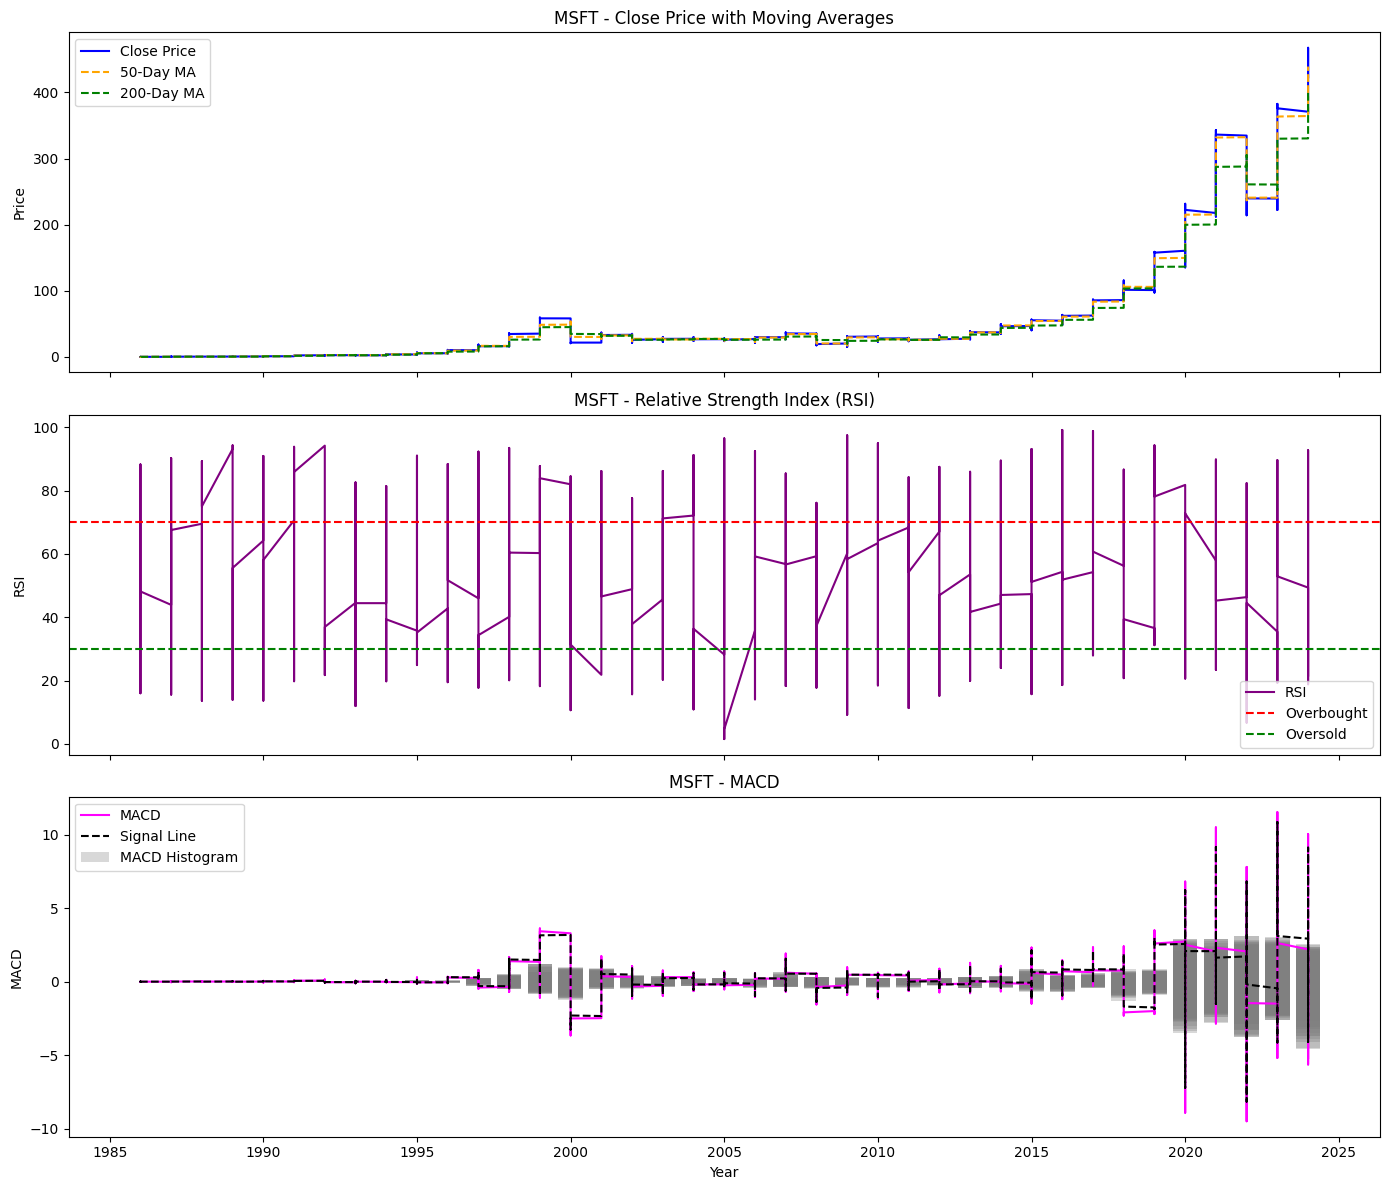

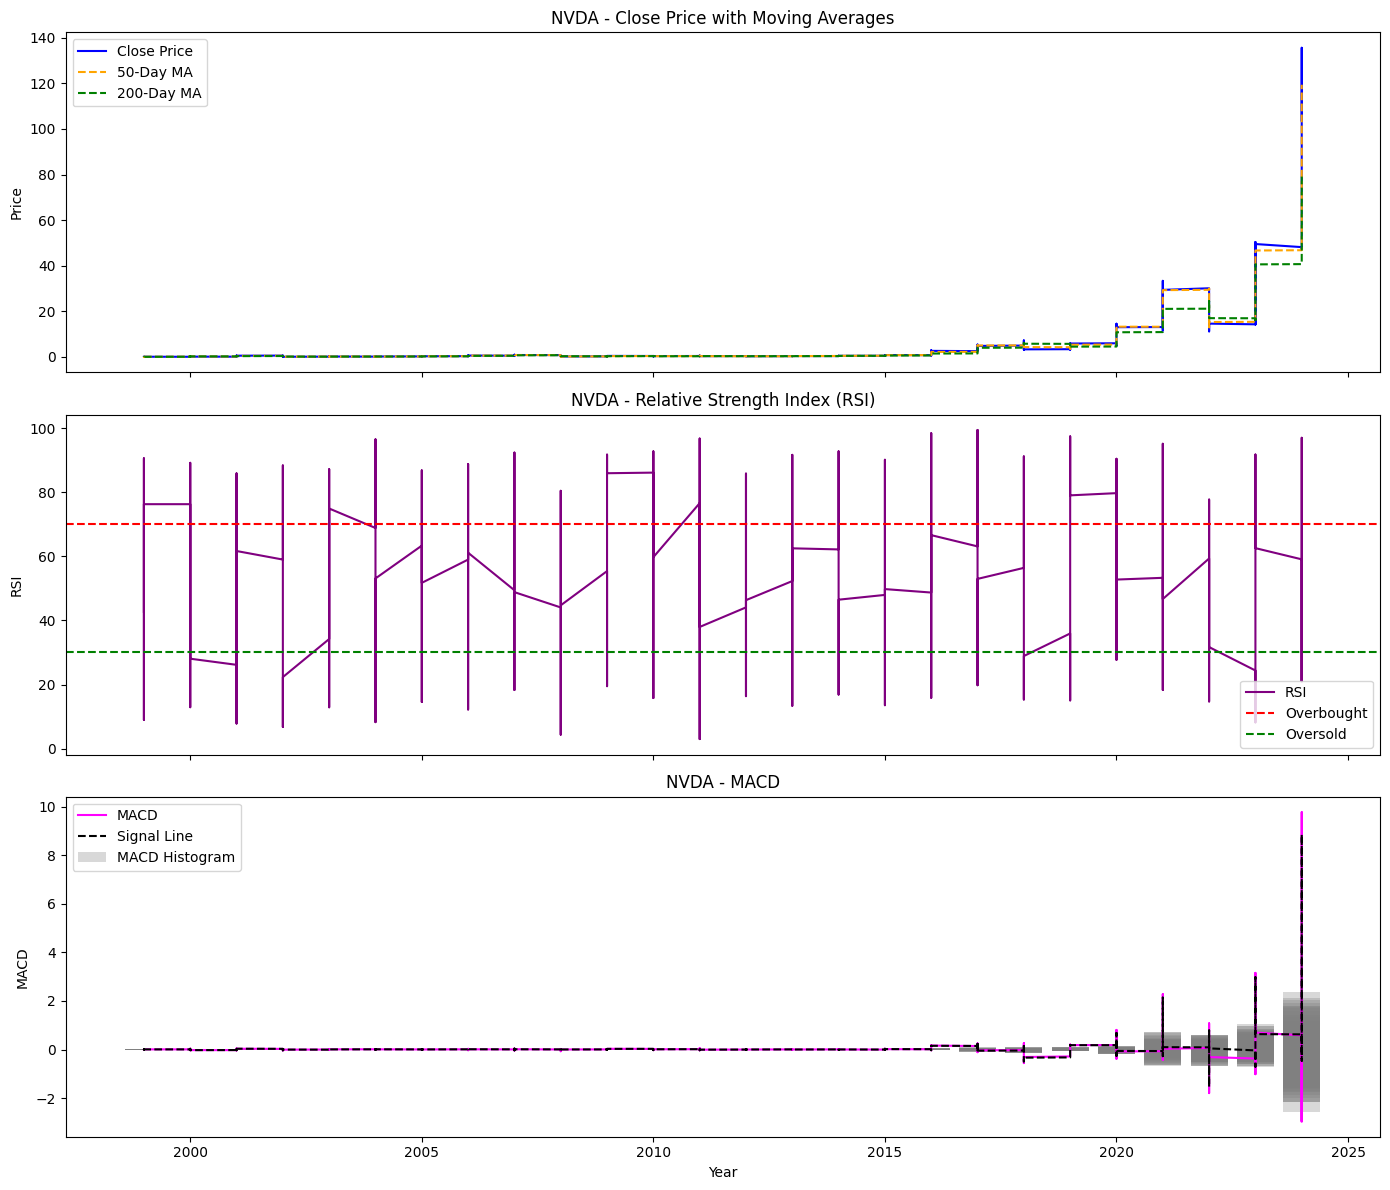

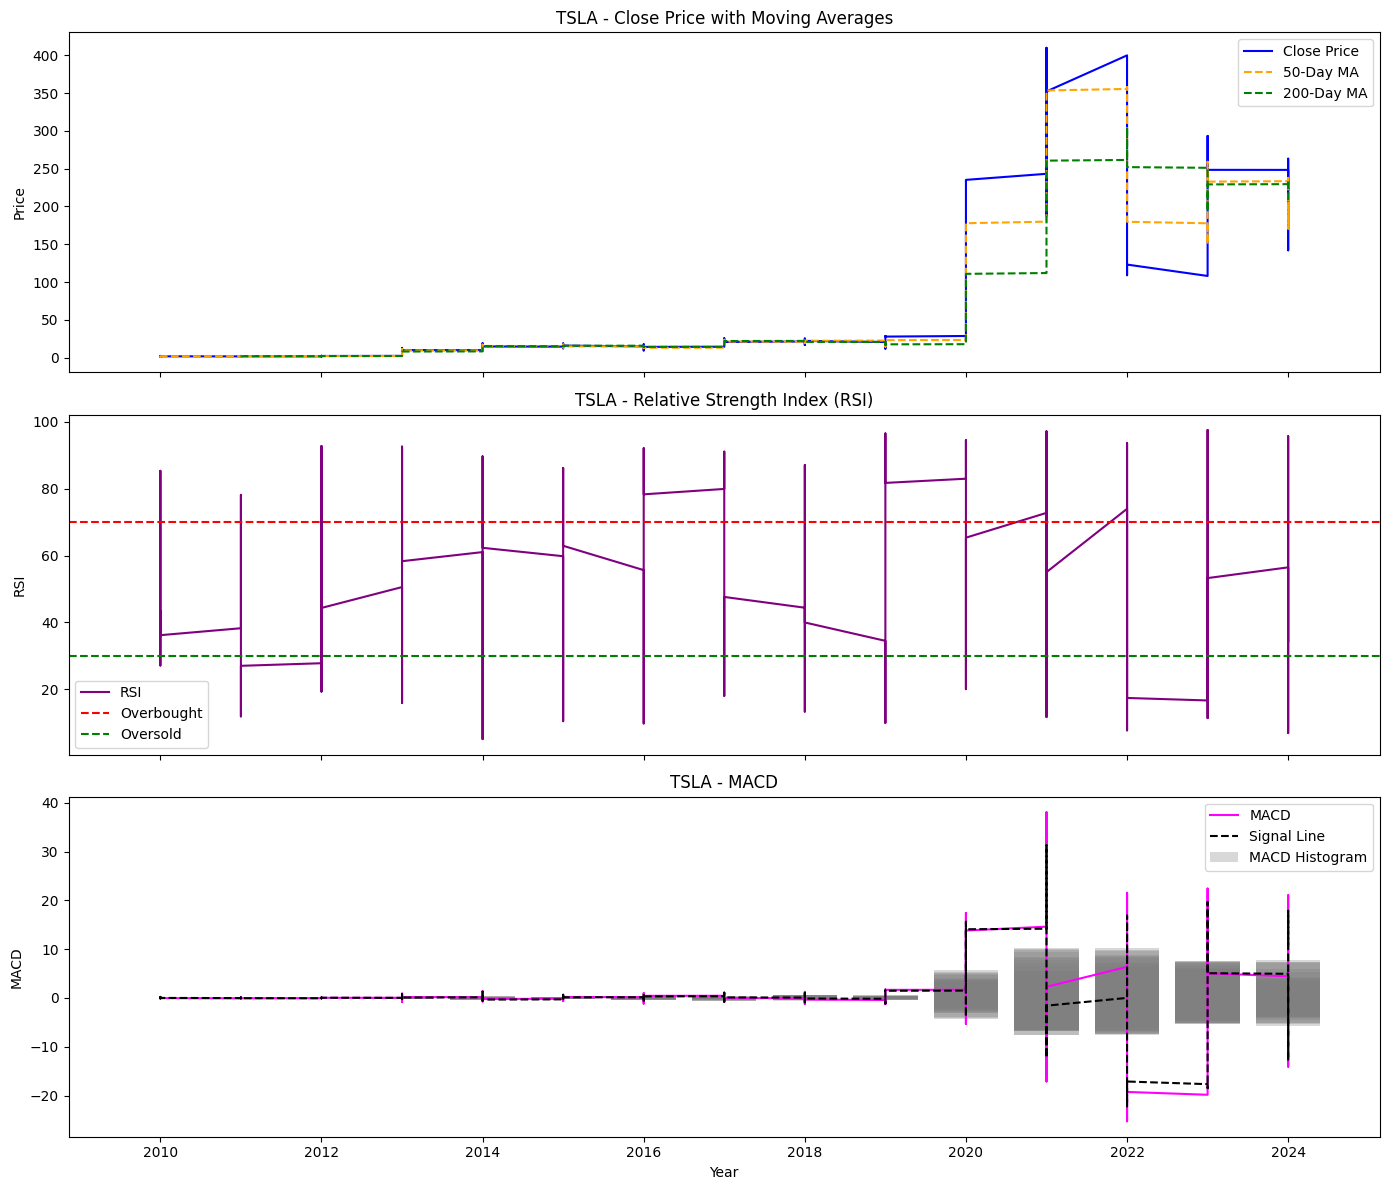

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_indicators(stock, df):
    df['Year'] = pd.to_datetime(df['Date']).dt.year
    
    fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharex=True)
    

    axs[0].plot(df['Year'], df['Close'], label='Close Price', color='blue')
    axs[0].plot(df['Year'], df['MA50'], label='50-Day MA', color='orange', linestyle='--')
    axs[0].plot(df['Year'], df['MA200'], label='200-Day MA', color='green', linestyle='--')
    axs[0].set_title(f'{stock} - Close Price with Moving Averages')
    axs[0].set_ylabel('Price')
    axs[0].legend()

    # Plot RSI
    axs[1].plot(df['Year'], df['RSI'], label='RSI', color='purple')
    axs[1].axhline(70, color='red', linestyle='--', label='Overbought')
    axs[1].axhline(30, color='green', linestyle='--', label='Oversold')
    axs[1].set_title(f'{stock} - Relative Strength Index (RSI)')
    axs[1].set_ylabel('RSI')
    axs[1].legend()

    # Plot MACD and Signal Line
    axs[2].plot(df['Year'], df['MACD'], label='MACD', color='magenta')
    axs[2].plot(df['Year'], df['MACD_Signal'], label='Signal Line', color='black', linestyle='--')
    axs[2].bar(df['Year'], df['MACD_Hist'], label='MACD Histogram', color='grey', alpha=0.3)
    axs[2].set_title(f'{stock} - MACD')
    axs[2].set_ylabel('MACD')
    axs[2].legend()

    plt.xlabel('Year')
    plt.tight_layout()
    plt.show()

for stock in all_data:
    plot_indicators(stock, all_data[stock])


Task-3

In [15]:
import pandas as pd
from datetime import datetime

def load_stock_data(symbol, file_path):
    df = pd.read_csv(file_path, nrows=5000000)  # Limit to 3 million rows
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df.set_index('Date', inplace=True)
    return df

stock_data = {symbol: load_stock_data(symbol, file_path) 
              for symbol, file_path in zip(stock_symbols, file_paths)}

def load_and_align_news_data(file_path):
    news_data = pd.read_csv(file_path, nrows=5000000)  
    
    
    print("News data date column:")
    print(news_data['date'].head(10))  
    print("\n")

    
    methods = [
        lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S'),
        lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S.%f'),
        lambda x: pd.to_datetime(x, infer_datetime_format=True),
        lambda x: pd.to_datetime(x, errors='coerce')
    ]

    for method in methods:
        try:
            news_data['date'] = method(news_data['date'])
            print(f"Parsing successful with method: {method.__name__}")
            break
        except ValueError:
            print(f"Parsing failed with method: {method.__name__}")

    
    problematic_dates = news_data['date'].isna().index[:10]  
    if len(problematic_dates) > 0:
        print("\nProblematic dates found:")
        for date in problematic_dates:
            print(f"Problematic date: {news_data.loc[date, 'date']}")
            print(news_data.loc[date])
            print()

    
    aligned_news_data = news_data.set_index('date')

    return aligned_news_data


aligned_news_data = load_and_align_news_data('../../doc1/Data/raw_analyst_ratings/raw_analyst_ratings.csv')


aligned_news_data.to_csv('../../doc1/Data/news_aligned.csv', chunksize=1000000)

print("Date alignment completed.")


News data date column:
0    2020-06-05 10:30:54-04:00
1    2020-06-03 10:45:20-04:00
2    2020-05-26 04:30:07-04:00
3    2020-05-22 12:45:06-04:00
4    2020-05-22 11:38:59-04:00
5    2020-05-22 11:23:25-04:00
6    2020-05-22 09:36:20-04:00
7    2020-05-22 09:07:04-04:00
8    2020-05-22 08:37:59-04:00
9    2020-05-22 08:06:17-04:00
Name: date, dtype: object


Parsing failed with method: <lambda>
Parsing failed with method: <lambda>
Parsing failed with method: <lambda>


C:\Users\USER\AppData\Local\Temp\ipykernel_8536\1407938427.py:27: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  lambda x: pd.to_datetime(x, infer_datetime_format=True),


Parsing successful with method: <lambda>

Problematic dates found:
Problematic date: 2020-06-05 10:30:54-04:00
Unnamed: 0                                                    0
headline                Stocks That Hit 52-Week Highs On Friday
url           https://www.benzinga.com/news/20/06/16190091/s...
publisher                                     Benzinga Insights
date                                  2020-06-05 10:30:54-04:00
stock                                                         A
Name: 0, dtype: object

Problematic date: 2020-06-03 10:45:20-04:00
Unnamed: 0                                                    1
headline             Stocks That Hit 52-Week Highs On Wednesday
url           https://www.benzinga.com/news/20/06/16170189/s...
publisher                                     Benzinga Insights
date                                  2020-06-03 10:45:20-04:00
stock                                                         A
Name: 1, dtype: object

Problematic date: 2020-05-26 

In [17]:

for symbol, df in stock_data.items():
    df['Daily_Return'] = df['Close'].pct_change()

  
    df.to_csv(f'../../doc1/Data/{symbol}_aligned.csv', chunksize=1000000)

print("Daily stock returns calculated.")


Daily stock returns calculated.


In [21]:

merged_data = {}
for symbol, df in stock_data.items():
    sentiment_df = stock_sentiment[stock_sentiment['stock'] == symbol]
    if not sentiment_df.empty:
        sentiment_df.set_index(df.index, inplace=True)  
        merged_df = df.merge(sentiment_df[['neg', 'neu', 'pos']], left_index=True, right_index=True, how='inner')
        merged_data[symbol] = merged_df
    else:
        print(f"No sentiment data found for symbol '{symbol}'")

print("Merged data for correlation analysis:")
for symbol, df in merged_data.items():
    print(f"{symbol} data:")
    print(df.head())



All correlation results:


In [ ]:
def safe_correlation(df):
    required_columns = ['Daily_Return', 'neg', 'neu', 'pos']
    if all(col in df.columns for col in required_columns):
        return df[['Daily_Return', 'neg', 'neu', 'pos']].corr().iloc[0, 1:]  
    else:
        print(f"Warning: Required columns not found for symbol '{symbol}'. Available columns: {df.columns.tolist()}")
        return None

correlation_results = {}
for symbol, df in merged_data.items():
    correlation = safe_correlation(df)
    correlation_results[symbol] = correlation

for symbol, correlation in correlation_results.items():
    if correlation is not None:
        print(f"{symbol}: Correlation between daily returns and sentiment scores:\n{correlation}\n")
    else:
        print(f"{symbol}: No correlation calculated due to missing required columns.")

print("\nAll correlation results:")
for symbol, correlation in correlation_results.items():
    if correlation is not None:
        print(f"{symbol}: {correlation.to_dict()}")
    else:
        print(f"{symbol}: N/A")
